<a href="https://colab.research.google.com/github/FilippMaksimov/SPSU.SOM_for_TSP/blob/main/SOM_MaksimovF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
def initialize_weights_circular(cities, num_neurons, radius):
    # 1. Находим центральную точку (среднее значение координат городов)
    center = np.mean(cities, axis=0)  # cities - это массив координат городов, размерностью (число городов, 2)

    # 2. Создаем равномерную сетку углов для нейронов
    angles = np.linspace(0, 2 * np.pi, num_neurons, endpoint=False)  # Углы для распределения по кругу

    # 3. Вычисляем координаты для кольца
    x = center[0] + radius * np.cos(angles)  # X-координаты
    y = center[1] + radius * np.sin(angles)  # Y-координаты

    # 4. Формируем веса в виде массива
    weights = np.column_stack((x, y))

    return weights

In [ ]:
class  :
    def __init__(self, num_neurons = 100, learning_rate_alpha=0.8, decay_rate_alpha = 0.99999, decay_rate_eta = 0.99999, eta = 1.5, n_iterations=1000):
      self.weights = np.random.rand(num_neurons, 2)
      self.learning_rate_alpha = learning_rate_alpha
      self.decay_rate_alpha = decay_rate_alpha
      self.decay_rate_eta = decay_rate_eta
      self.eta = eta
      self.n_iterations = n_iterations
      self.num_neurons = num_neurons

    def train(self, data):

      self.cities = data
      data = np.array(list(data.values()))

      self.weights = initialize_weights_circular(data, self.num_neurons, self.eta)
      for i in range(self.n_iterations):
        #Обновляем скорость обучения и радиус сходимости
        self.learning_rate_alpha *= self.decay_rate_alpha
        self.eta *= self.decay_rate_eta

        #Генерация случайного входного вектора из городов
        input_vector = data[np.random.randint(len(data))]
        #Нахождение победителя (нейрон с минимальным расстоянием до входного вектора)
        distances = np.linalg.norm(self.weights - input_vector, axis=1)
        winner_idx = np.argmin(distances)

        #Обновление весов нейронов
        self.weights = self.update_weights(input_vector, winner_idx)


    def neighborhood_function(self, winner_idx, neuron_idx):
      distance = np.linalg.norm(winner_idx - neuron_idx)
      return np.exp(-distance / (2 * self.eta**2))

    def update_weights(self, input_vector, winner_idx):
      for i in range(self.weights.shape[0]):
        g = self.neighborhood_function(winner_idx, i)
        self.weights[i] += self.learning_rate_alpha * g * (input_vector - self.weights[i])
      return self.weights

    def plot_lines(self):
      order = np.argsort(np.linalg.norm(self.weights[:, np.newaxis] - self.weights, axis=2).sum(axis=1))

      plt.figure(figsize=(12, 10))

      plt.plot(self.weights[:, 1], self.weights[:, 0], '--', label='Нейроны', color='b')  # Соединяем нейроны линиями
      plt.plot([self.weights[0, 1], self.weights[-1, 1]], [self.weights[0, 0], self.weights[-1, 0]], '--', color='b')
      plt.scatter(self.weights[:, 1], self.weights[:, 0], label='Нейроны SOM', color='blue')

      for city, (lat, lon) in self.cities.items():
        plt.scatter(lon, lat, label=city, color='red')
        plt.text(lon, lat, city, fontsize=9, ha='right')

      plt.title(f'Число нейронов: {self.num_neurons}, число итераций: {self.n_iterations}')
      plt.xlabel('Долгота')
      plt.ylabel('Широта')
      plt.legend()
      plt.grid()
      plt.show()

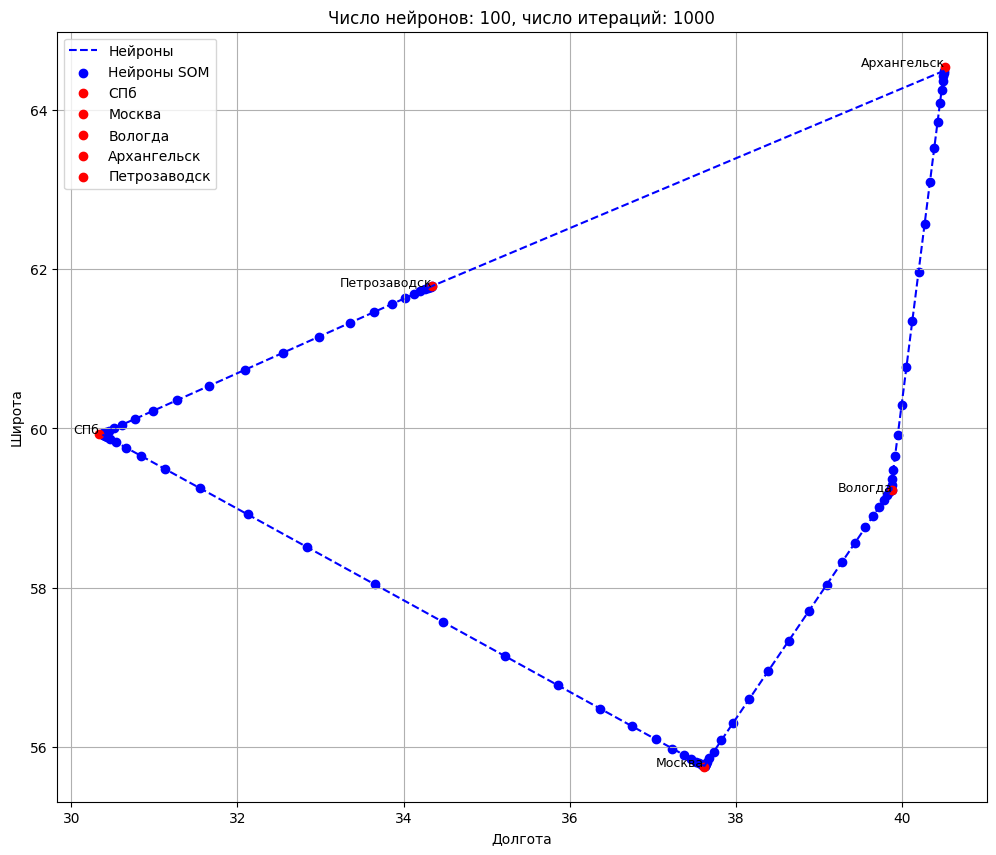

In [ ]:
# Пример координат городов (широта, долгота)
cities = {
    'СПб': (59.9343, 30.3351),
    'Москва': (55.7558, 37.6173),
    'Вологда': (59.2252, 39.8833),
    'Архангельск': (64.5372, 40.5151),
    'Петрозаводск': (61.7850, 34.3425)
}

# Инициализация и обучение карты
kohonen_map = KohonenMap()
kohonen_map.train(cities)
kohonen_map.plot_lines()


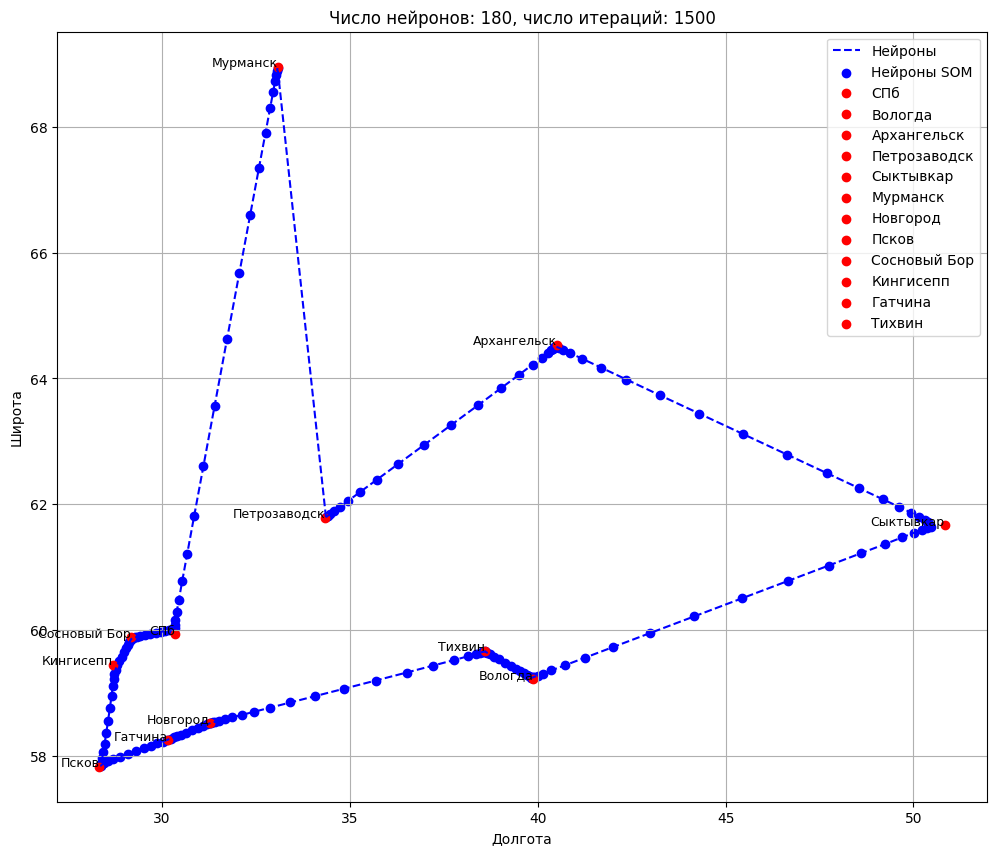

Время выполенния,  4.70546555519104


In [ ]:
# Пример координат городов (широта, долгота)
cities_2 = {
    'СПб': (59.9343, 30.3351),
    'Вологда': (59.2252, 39.8833),
    'Архангельск': (64.5372, 40.5151),
    'Петрозаводск': (61.7850, 34.3425),
    'Сыктывкар': (61.6685, 50.8340),
    'Мурманск': (68.9585, 33.0820),
    'Новгород': (58.5215, 31.2753),
    'Псков': (57.8250, 28.3299),
    'Сосновый Бор': (59.8820, 29.1660),
    'Кингисепп': (59.4450, 28.7060),
    'Гатчина': (58.2500, 30.1500),
    'Тихвин': (59.6700, 38.6000)
}
import time
# Инициализация и обучение карты
start = time.time()
kohonen_map_2 = KohonenMap(num_neurons =180, learning_rate_alpha=0.8, decay_rate_alpha = 0.99999, decay_rate_eta = 0.99999, eta = 1.5, n_iterations=1500)
kohonen_map_2.train(cities_2)
kohonen_map_2.plot_lines()
print('Время выполенния, ', time.time() - start)

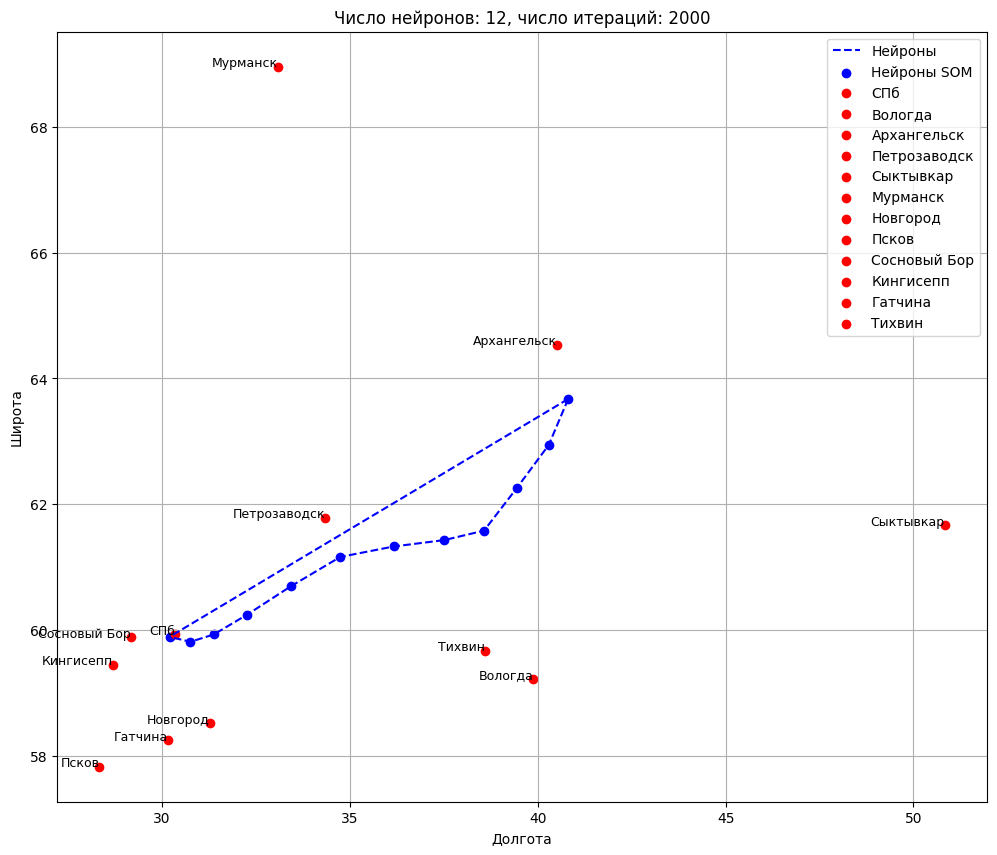

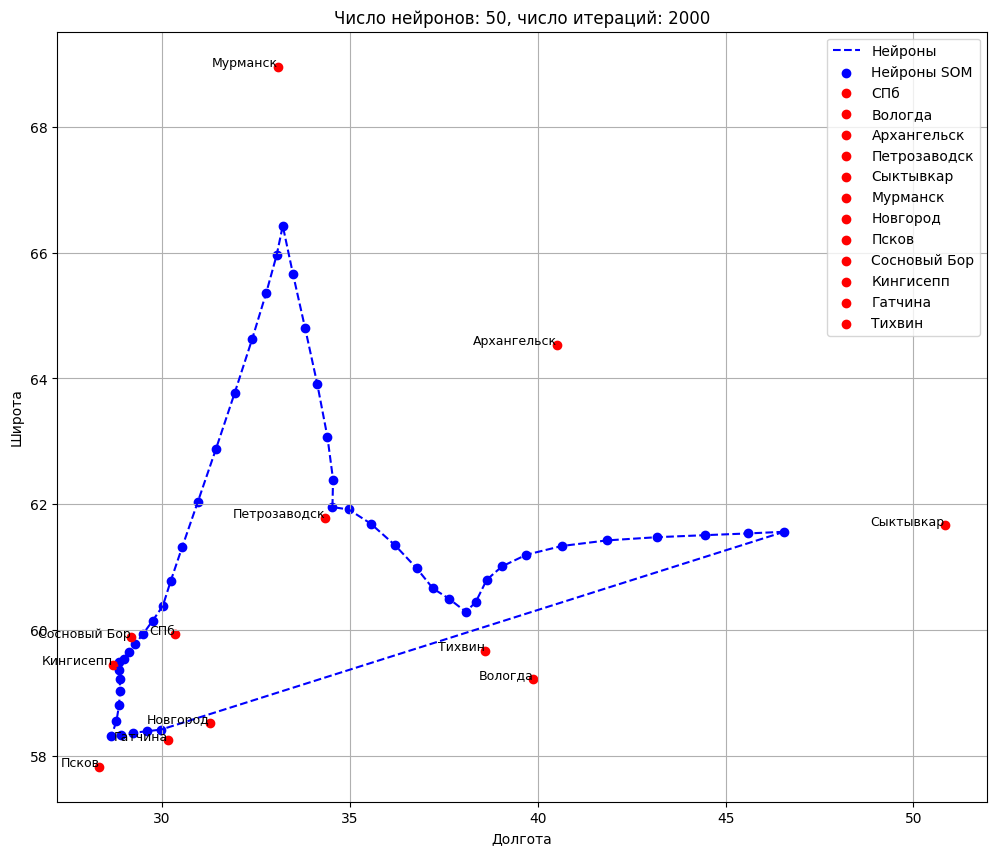

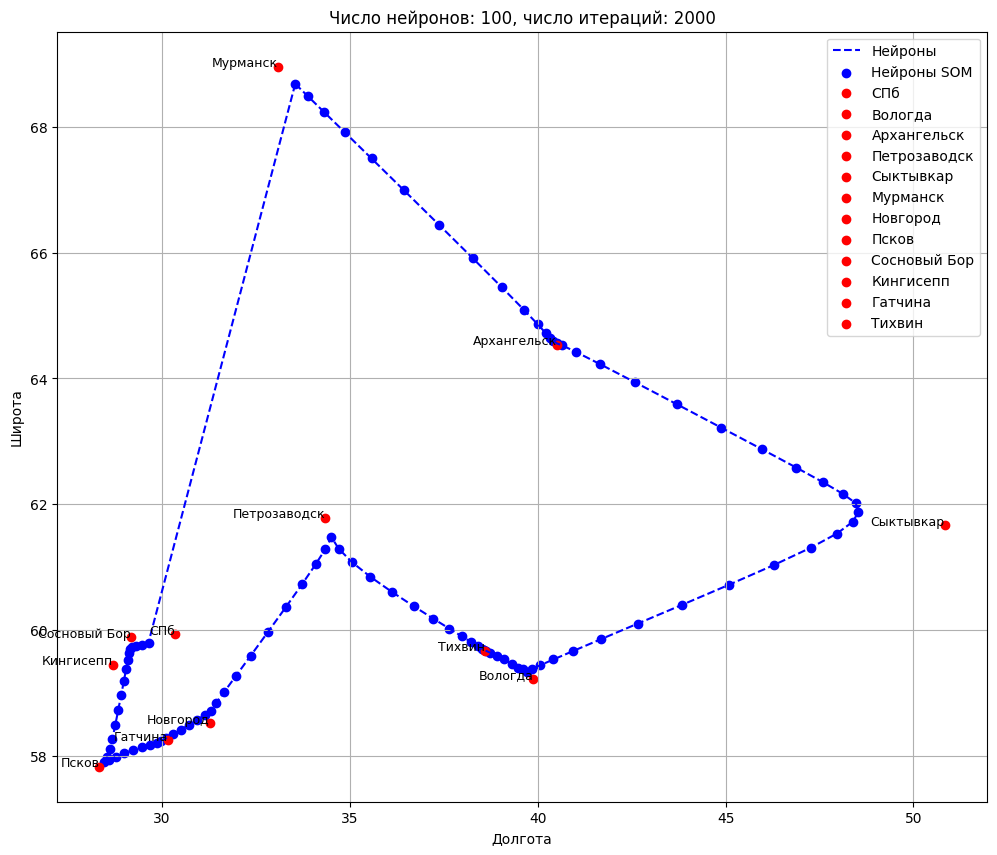

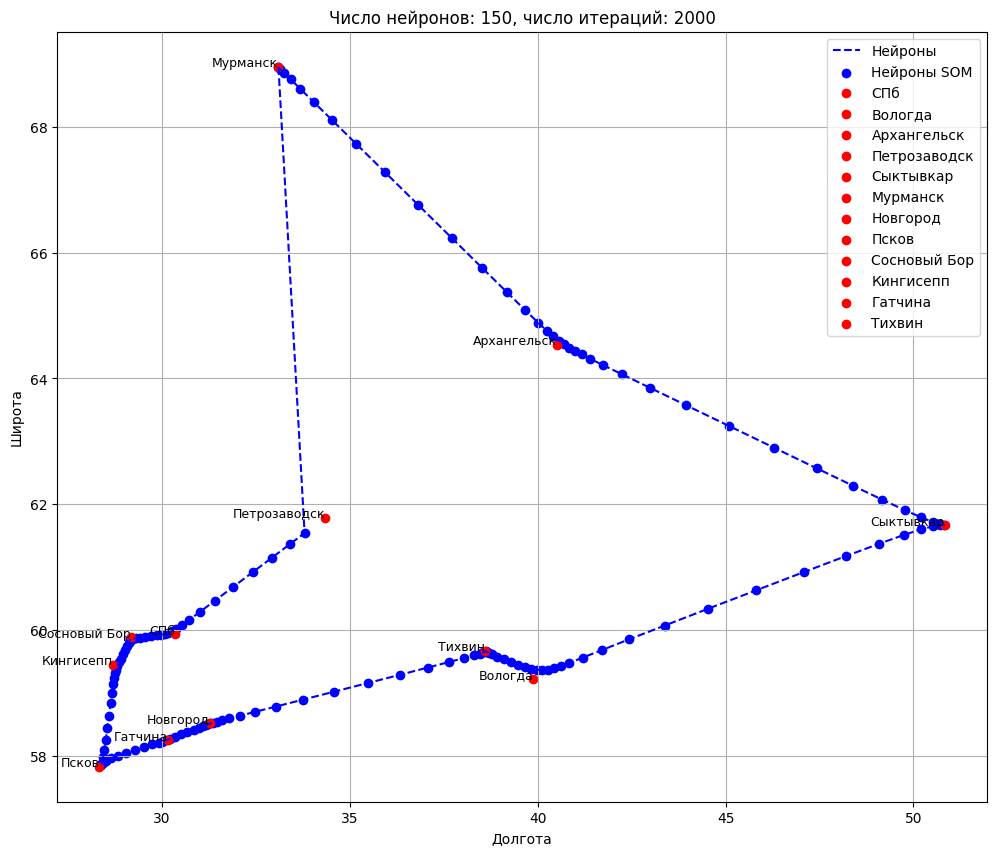

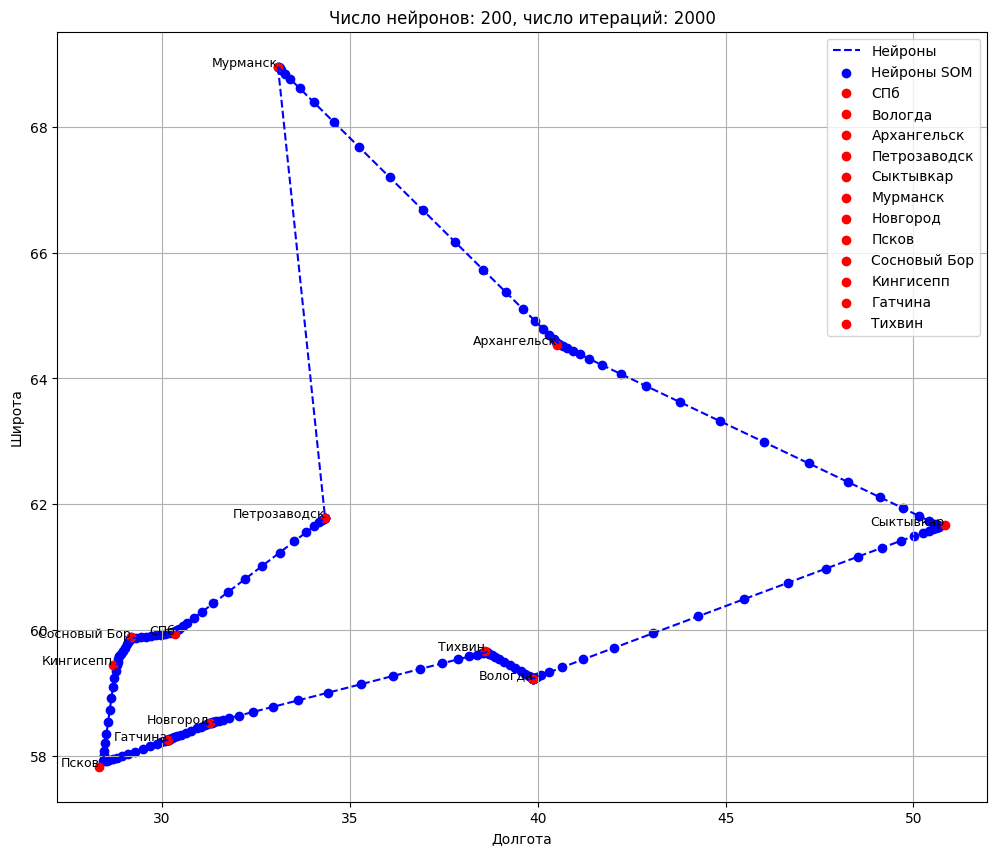

In [ ]:
neurons_num = [len(cities_2), 50, 100, 150, 200]

for n in neurons_num:
  kohonen_map_2 = KohonenMap(num_neurons = n, learning_rate_alpha=0.8, decay_rate_alpha = 0.99999, decay_rate_eta = 0.99999, eta = 1.5, n_iterations=2000)
  kohonen_map_2.train(cities_2)
  kohonen_map_2.plot_lines()

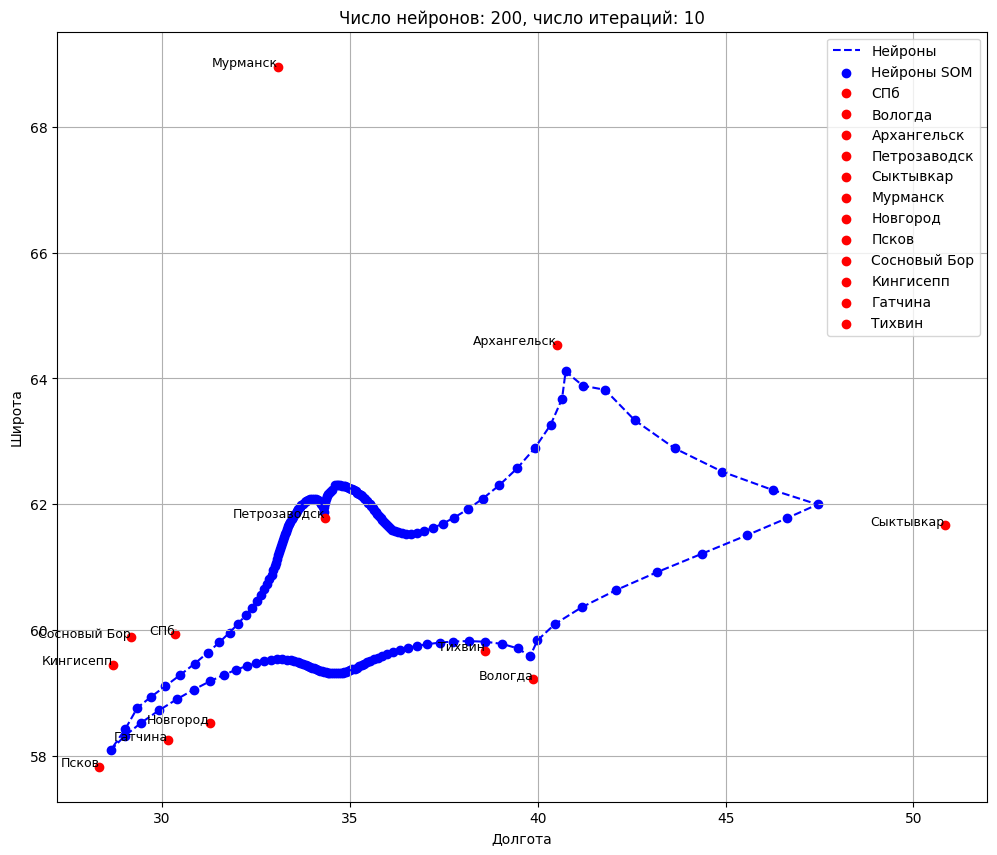

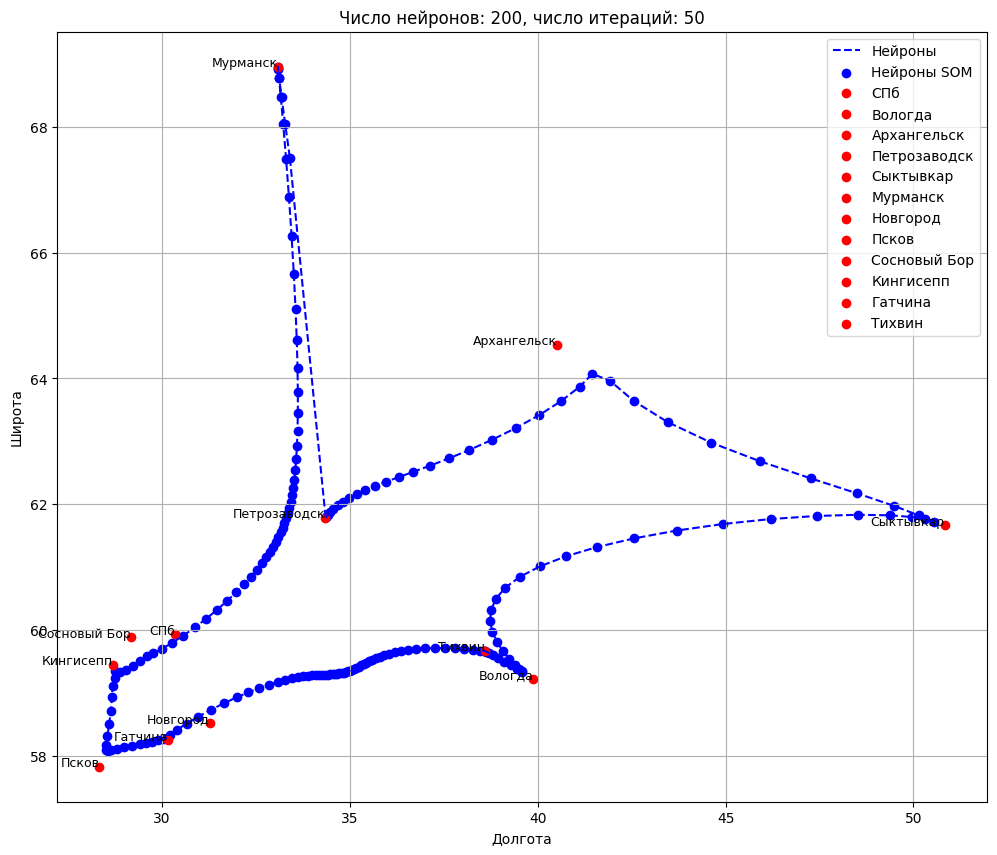

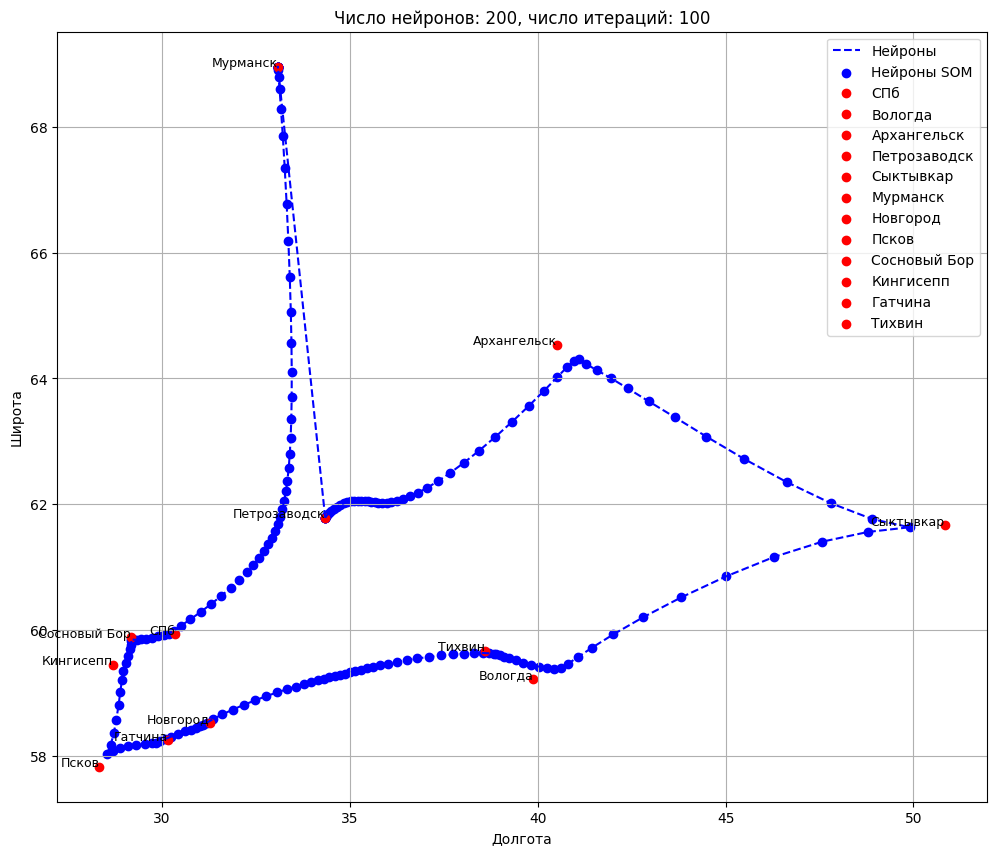

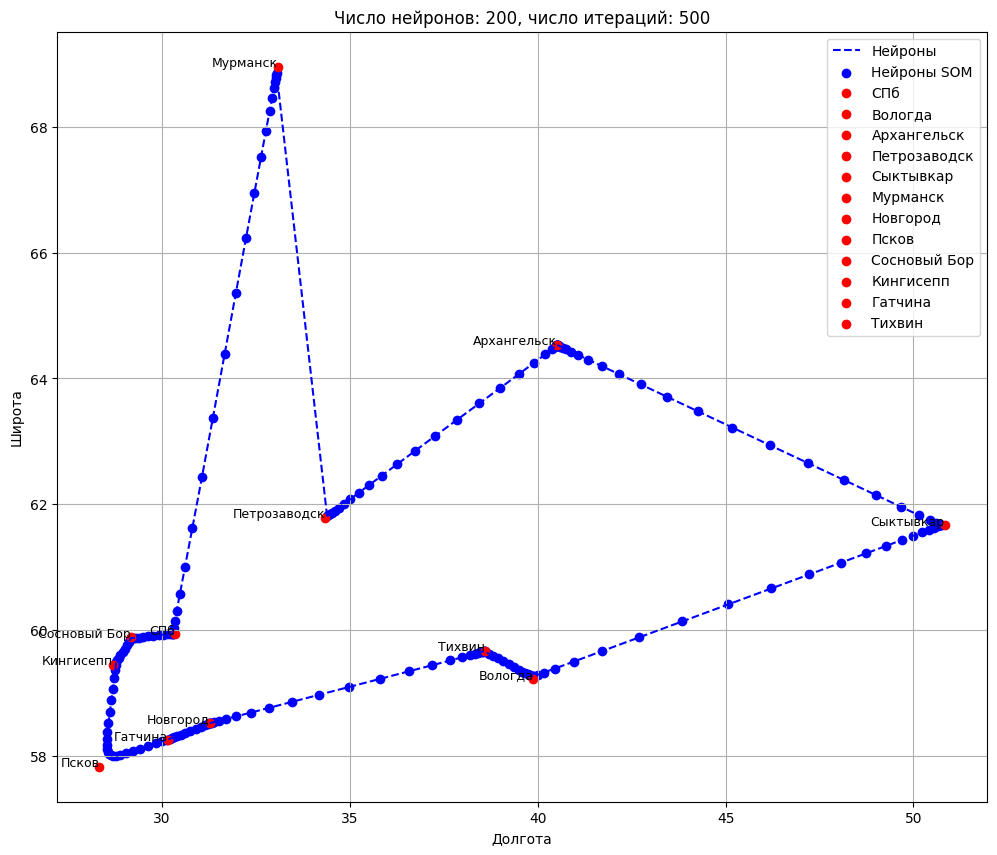

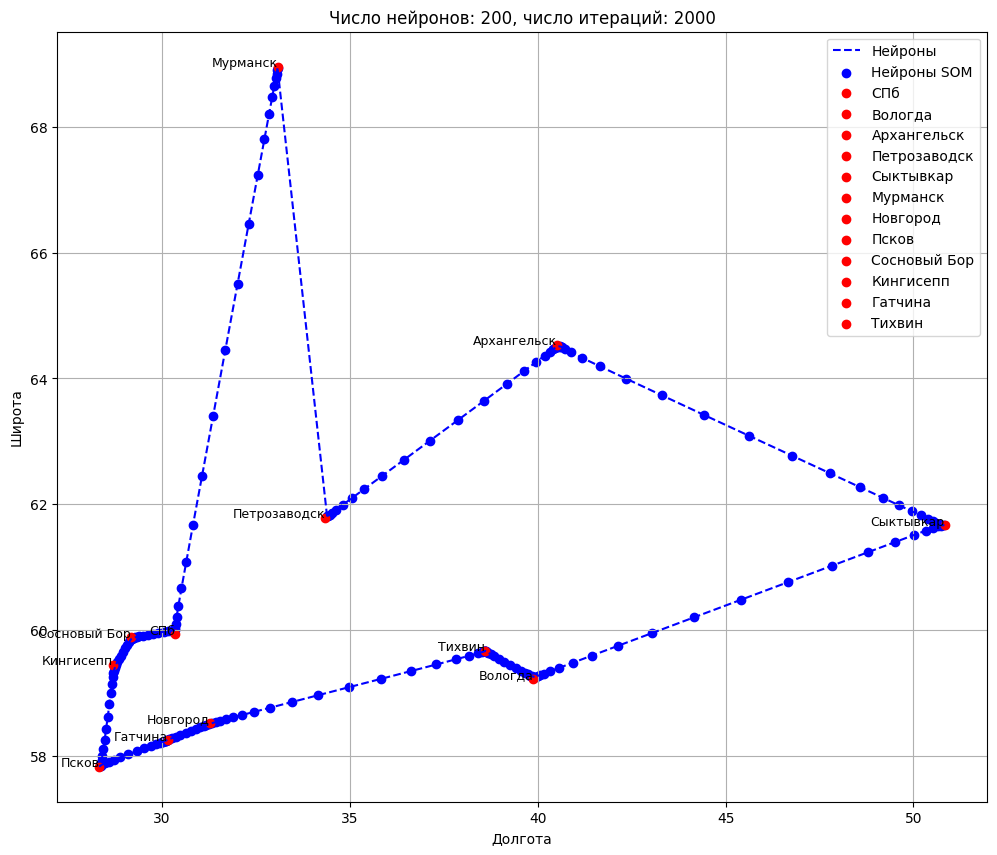

In [ ]:
iterations_num = [10, 50, 100, 500, 2000]

for i in iterations_num:
  kohonen_map_2 = KohonenMap(num_neurons = 200, learning_rate_alpha=0.8, decay_rate_alpha = 0.99999, decay_rate_eta = 0.99999, eta = 1.5, n_iterations=i)
  kohonen_map_2.train(cities_2)
  kohonen_map_2.plot_lines()

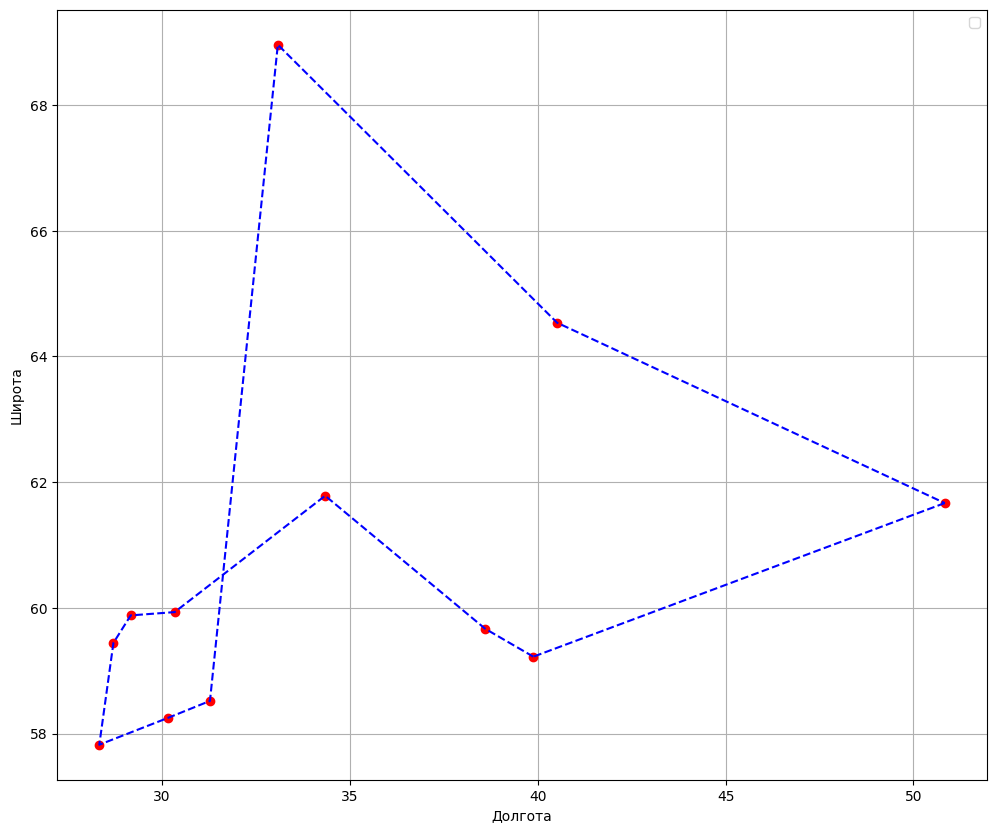

In [ ]:
#Метод ближайшего соседа
n=50; m=100; way=[]; a=0
Y=[val[0] for val in cities_2.values()]
X=[val[1] for val in cities_2.values()]
n=len(X)
RS=[];RW=[];RIB=[]
s=[]
for ib in np.arange(0,n,1):
  M = np.zeros([n,n])
  for i in np.arange(0,n,1):
    for j in np.arange(0,n,1):
      if i!=j:
        M[i,j]=np.sqrt((X[i]-X[j])**2+(Y[i]-Y[j])**2)
      else:
        M[i,j]=float('inf')
  way=[]
  way.append(ib)
  for i in np.arange(1,n,1):
    s=[]
    for j in np.arange(0,n,1):
      s.append(M[way[i-1],j])
    way.append(s.index(min(s)))
    for j in np.arange(0,i,1):
      M[way[i],way[j]]=float('inf')
      M[way[i],way[j]]=float('inf')
  S=sum([np.sqrt((X[way[i]]-X[way[i+1]])**2+(Y[way[i]]-Y[way[i+1]])**2) for i in np.arange(0,n-1,1)])+ np.sqrt((X[way[n-1]]-X[way[0]])**2+(Y[way[n-1]]-Y[way[0]])**2)
  RS.append(S)
  RW.append(way)
  RIB.append(ib)
S=min(RS)
way=RW[RS.index(min(RS))]
ib=RIB[RS.index(min(RS))]
X1=[X[way[i]] for i in np.arange(0,n,1)]
Y1=[Y[way[i]] for i in np.arange(0,n,1)]
plt.figure(figsize=(12, 10))
plt.plot(X1, Y1, color='r', linestyle=' ', marker='o')
plt.plot(X1, Y1, color='b', linestyle='--')
X2=[X[way[n-1]],X[way[0]]]
Y2=[Y[way[n-1]],Y[way[0]]]
plt.plot(X2, Y2, color='b', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.grid(True)
plt.show()

In [ ]:
!pip install python_tsp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
cupy-cuda12x 12.2.0 requi

In [ ]:
from python_tsp.exact import solve_tsp_brute_force

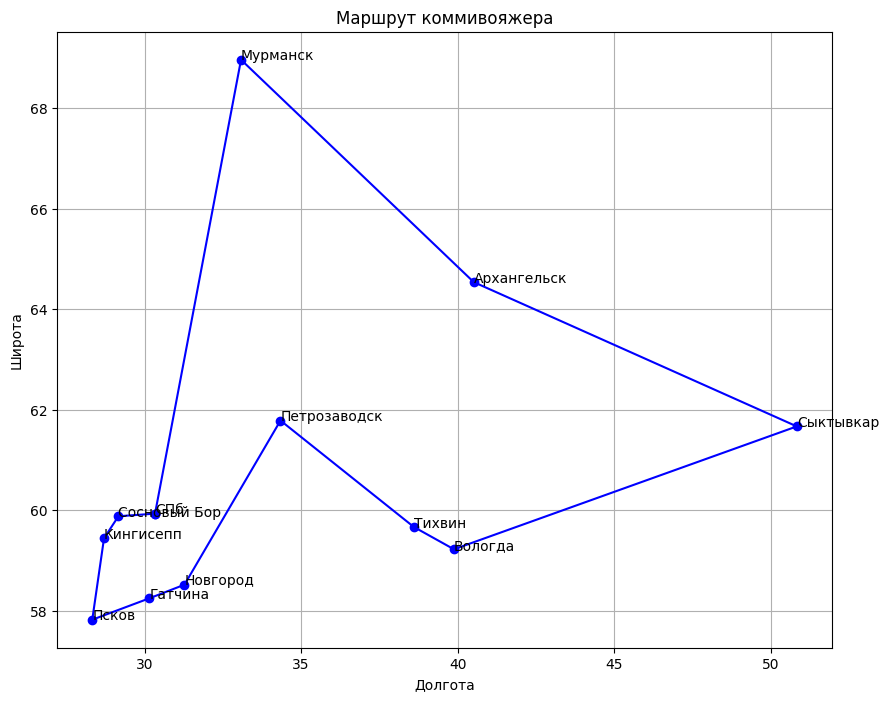

Время выполнения,  335.21608114242554


In [ ]:
# Матрица расстояний
time_sum = 0

def calculate_distance_matrix(cities):
    city_names = list(cities.keys())
    size = len(city_names)
    distance_matrix = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            if i != j:
                coord1 = cities[city_names[i]]
                coord2 = cities[city_names[j]]
                # Вычисляем евклидово расстояние
                distance = np.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)
                distance_matrix[i][j] = distance

    return distance_matrix, city_names

start2 = time.time()
distance_matrix, city_names = calculate_distance_matrix(cities_2)
for i in range(100):
  permutation, distance = solve_tsp_brute_force(distance_matrix)
  route = [city_names[i] for i in permutation] + [city_names[permutation[0]]]
  time_sum += time.time() - start2

print(time_sum / 100)

def plot_route(cities, route):
    plt.figure(figsize=(10, 8))

    # Получаем координаты для маршрута
    xs = [cities[city][1] for city in route]
    ys = [cities[city][0] for city in route]

    plt.plot(xs, ys, marker='o', linestyle='-', color='blue')

    for city in cities.keys():
        plt.text(cities[city][1], cities[city][0], city)

    plt.title('Маршрут коммивояжера')
    plt.xlabel('Долгота')
    plt.ylabel('Широта')
    plt.grid()
    plt.show()

plot_route(cities_2, route)
print('Время выполнения, ', time.time() - start2)

In [ ]:
import time
time_sum = 0

# Инициализация и обучение карты
for i in range(100):
  start = time.time()
  kohonen_map_2 = KohonenMap(num_neurons =180, learning_rate_alpha=0.8, decay_rate_alpha = 0.99999, decay_rate_eta = 0.99999, eta = 1.5, n_iterations=1500)
  kohonen_map_2.train(cities_2)
  time_sum += time.time() - start

print(time_sum / 100)

3.9897977566719054
